In [3]:
!pip install pandas
!pip install numpy

In [4]:
!pip install seaborn

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


df.isnull().sum()

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [11]:
df = df.drop(['Unnamed: 0','key'],axis = 1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_datetime    199999 non-null  object 
 2   pickup_longitude   199999 non-null  float64
 3   pickup_latitude    199999 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 12.2+ MB


In [20]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [24]:
df.dropna(inplace = True)
df.info()
df = df.drop(['Unnamed: 0','key'],axis = 1)

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         199999 non-null  int64              
 1   key                199999 non-null  object             
 2   fare_amount        199999 non-null  float64            
 3   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 4   pickup_longitude   199999 non-null  float64            
 5   pickup_latitude    199999 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    199999 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 15.3+ MB


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        199999 non-null  float64            
 1   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 2   pickup_longitude   199999 non-null  float64            
 3   pickup_latitude    199999 non-null  float64            
 4   dropoff_longitude  199999 non-null  float64            
 5   dropoff_latitude   199999 non-null  float64            
 6   passenger_count    199999 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 12.2 MB


<Axes: >

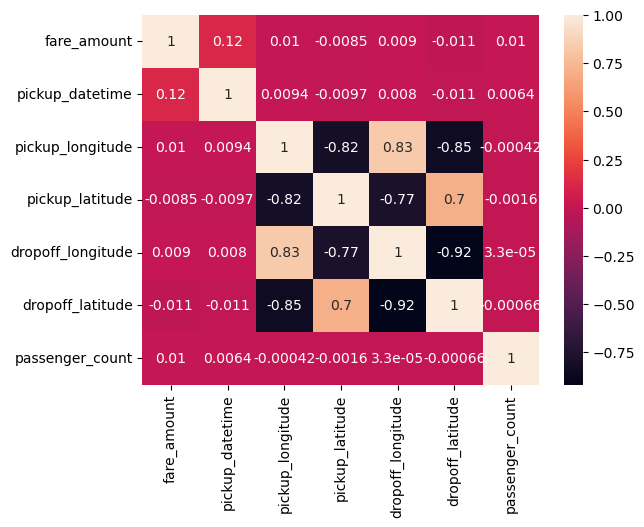

In [26]:
corelation = df.corr()
sns.heatmap(corelation, annot=True)

Text(0.5, 1.0, 'Boxplot of Fare Amount')

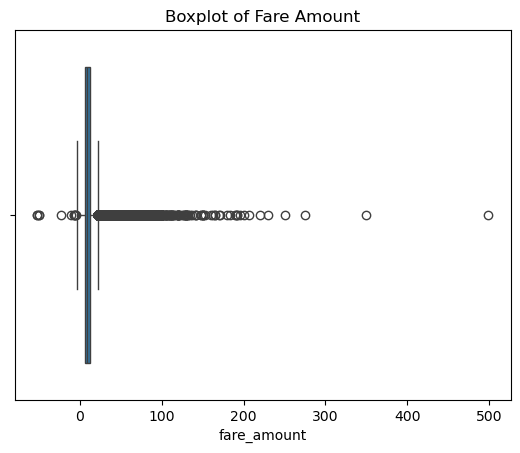

In [27]:
sns.boxplot(x=df['fare_amount'])
plt.title('Boxplot of Fare Amount')

In [28]:
# Using Inter-Quantile Range to remove outliers
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['fare_amount'] > lower) & (df['fare_amount'] < upper)]

Text(0.5, 1.0, 'Boxplot of Fare Amount after removing outliers')

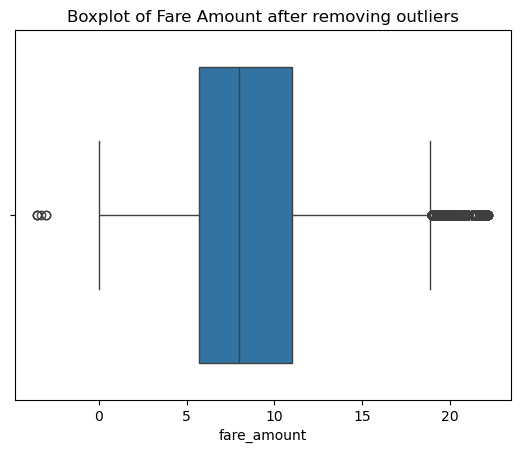

In [29]:
sns.boxplot(x=df['fare_amount'])
plt.title('Boxplot of Fare Amount after removing outliers')

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor

In [31]:

# Calculate distance using simple Euclidean formula
df["distance"] = (
    ((df['dropoff_latitude'] - df['pickup_latitude'])**2 +
     (df['dropoff_longitude'] - df['pickup_longitude'])**2) * 0.5
)

# Filter for reasonable fare, passenger count, and distance
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] < 100)]
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] <= 6)]
df = df[df['distance'] < 5]

In [33]:
# Feature and target selection
X = df[['distance', 'passenger_count']]
y = df['fare_amount']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [34]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation function
def evaluate(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Results:")
    print(f"  R² Score: {r2:.4f}")
    print(f"  RMSE: {rmse:.4f}\n")

In [35]:

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest Regression")

Linear Regression Results:
  R² Score: -0.0069
  RMSE: 4.1474

Random Forest Regression Results:
  R² Score: 0.6059
  RMSE: 2.5948

